# Project: Market-Basket Analysis Using Association Rule.

## Table of Contents

<ul>
<li><a href="#PS">Problem Statement</a></li>
<li><a href="#DG">Data Gathering</a></li>
<li><a href="#DA">Data Assessing</a></li>
<li><a href="#DC">Data Cleansing</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#CI">Conclusions & Inference</a></li>
</ul>

<a id="PS"></a>
# Problem Statement

> Intiating a rule for the frequent itemsets in our Market-Basket data using Apriori Algorithm & Association rule to uncover the hidden pattern of the customers purchasing behavior.

<a id="DG"></a>
# Data Gathering & Importing the needed Libraries.

In [1]:
#importing pip and mlxtened package.
import pip
pip.main(['install', 'mlxtend'])

You are using pip version 9.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [2]:
# importing pandas and apriori from mlxtned
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
# importing the needed file
df = pd.read_excel('E:\Basics of ML & Python\Online Retail.xlsx')

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


<a id="DS"></a>
# Data Assessing.

> We will check our data to make sure that there is no missing data, data is valid, accurate and consistent.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Seems like the data attributes are defined properly with the correct type but we have some of the missing entries in a certain columns.

In [6]:
#checking the number of missing values for each columns
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#let's have a look on the missing values in Description column 
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [8]:
df['Description'].isnull().sum()/df['Description'].count()

0.002690325744048996

In [9]:
#checking the unique values of the Quantity column
df['Quantity'].value_counts()

 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
 1287         1
-5368         1
 267          1
-244          1
 512          1
Name: Quantity, Length: 722, dtype: int64

In [10]:
#checking the unique values of the InvoiceNo column
df['InvoiceNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
564574       1
564564       1
577611       1
544698       1
578475       1
Name: InvoiceNo, Length: 25900, dtype: int64

### To summarize our assessment to the data we found:
> Missing data in the description column we need to drop it.

> Identifing a threshold for the quantity per entrie.

> We can get rid of the Credit Card trans from the InvoiceNo column for further analysis.

<a id="DC"></a>
# Data Cleaning.

> Now we will write the necessery code to clean our data and make it ready for analysis.

In [11]:
#Droping the missing data from description column
df.dropna(subset = ['Description'], inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [13]:
# filtering by quantity more than 6 as threshold
df[df['Quantity']>6]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
...,...,...,...,...,...,...,...,...
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France


In [14]:
#Exclusding Credit Card transactions from InvoiceNo column but first we need to convert the column type to be string 
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

df = df[~ df['InvoiceNo'].str.contains('C')]

In [15]:
df[df['InvoiceNo'] == 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


<a id="EDA"></a>
# Exploratory Data Analysis.

In [16]:
countries = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
countries

Country
United Kingdom          486168
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [17]:
import matplotlib.pyplot as plt

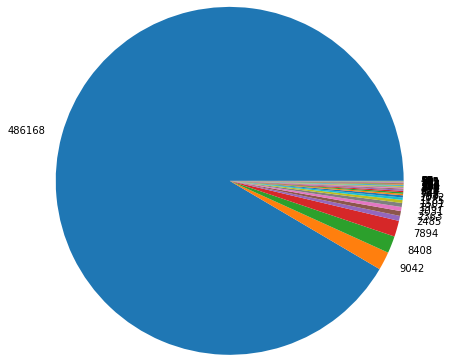

In [18]:
plt.pie(countries, labels=countries, radius=2);

### Now we can breakdown our data for each country to extract a rule that fits purchase behavior in each on. We will filter by UK as it's the majority of the data.

In [19]:
# filtering by country 'United Kingdom'
basket = df[df['Country'] == 'United Kingdom']

In [20]:
basket.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
# group by invoice and description, sum quantity for the data, unstack it to make rows and colunms , fill null values with 0  
basket = basket.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().fillna(0)
basket

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now we have designed a new table that we are going to use to extract the frequent itemset, but first we need to define a function to map all the output to be 1 and 0.

In [22]:
def encode_units(x):
    """"return values more than or equal 1 to 1 , less than or equal 0 to 0""" 
    if x >= 1 :
        return 1
    if x <= 0 :
        return 0

In [23]:
#applying the function to the DataFrame.
basket = basket.applymap(encode_units)

In [24]:
basket

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="CI"></a>
# Conclusion & Inference.
> Using Apriori Algorithm to get the frequent itemset, as we need to calculate support for each itemset with minimum support threshold 3% then we will define the association rule for each pair with minimum confidence of 7%.

> Support is the percenage of the itemset in our dataset.  __"Itemset could be set of items or one item"__

> Confidence is the support of association rule of 2 itemsets/the support of the itemset.

In [25]:
# identifing frequent itemset with min support 
frequent_items = apriori(basket, min_support= 0.03, use_colnames=True)
frequent_items.head(10)

,support,itemsets
0,0.045800,(6 RIBBONS RUSTIC CHARM)
1,0.031123,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040336,(60 TEATIME FAIRY CAKE CASES)
3,0.046925,(ALARM CLOCK BAKELIKE GREEN)
4,0.035140,(ALARM CLOCK BAKELIKE PINK)
5,0.049818,(ALARM CLOCK BAKELIKE RED )
6,0.036212,(ANTIQUE SILVER T-LIGHT GLASS)
7,0.073441,(ASSORTED COLOUR BIRD ORNAMENT)
8,0.042265,(BAKING SET 9 PIECE RETROSPOT )
9,0.033051,(BATHROOM METAL SIGN)


In [26]:
# making the rule using the frquent itemset and confidence with min 7%
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.07)

In [27]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.046925,0.049818,0.030159,0.642694,12.900874,0.027821,2.659296
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.049818,0.046925,0.030159,0.605376,12.900874,0.027821,2.415149
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037658,0.050032,0.030909,0.820768,16.404818,0.029024,5.300218
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050032,0.037658,0.030909,0.617773,16.404818,0.029024,2.517724
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.051264,0.050032,0.037551,0.732497,14.640537,0.034986,3.551247


## We have measured support, confidence and lift for the frequent itemsets that we have in our data in UK.